This notebook illustrates the simplified (perpendicular) motion of an ion under a left-handed polarized electric field.

In [1]:
# Python modules import
import numpy as np # numpy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D # allows 3D plots with the keyword projection='3d' below

%matplotlib inline

In [2]:
from scipy.integrate import odeint # Integrate a system of ordinary differential equations.
from scipy.constants import c, pi, m_e, e, m_p, m_u # some physical constants

In this notebook, we look for the trajectory of a particle travelling in a magnetic field B0 and subject to a rotating electric field $E_+$. Thus, we want to solve :
$$
m \frac{d^2 \mathbf{r}}{ dr^2} = q \left( \mathbf{E} + \mathbf{v} \times \mathbf{B}
\right)
$$

## No  electric field
First of all, let's assume no electric field ($\mathbf{E}=0$) and only a constant magnetic field along the $z$ direction.

Let's define our position vector as :
$$
\mathbf{r}=
\left(
\begin{array}{c}
x \\
y \\ 
z
\end{array}
\right)
$$

We have thus to solve for :
$$
\left(
\begin{array}{c}
x \\
y \\
z \\
\dot{x} \\
\dot{y} \\
\dot{z}
\end{array}
\right)
=
\left(
\begin{array}{c}
\dot{x} \\
\dot{y} \\
\dot{z} \\
+q/m \dot{y} B_0 \\
-q/m \dot{x} B_0 \\
0
\end{array}
\right)
$$

In [3]:
B0 = 3 # Tesla

In [4]:
def fun(u, t):
    """
    Computes the derivatives f(u,t).
    
    Inputs:
     - u: (x,y,z,xdot,ydot,zdot) (6x1 array)
   
    Returns:
     - f(u) (6x1 array)
    
    """
    x, y, z, xdot, ydot, zdot = u # unpacking
    
    f = [xdot, 
         ydot, 
         zdot, 
         B0*e/m_p*ydot,
         -B0*e/m_p*xdot,
         0]        
    
    return f 

In [5]:
# cyclotron frequency
omega_c = e*B0/m_p
# time array
t = np.linspace(0, 5*2*pi/omega_c, 1001)
# initial position : particle in (x,y,z)=(0,0,0) and at rest
u0 = [0,0,0,1,1,1]
# solving 
u_num = odeint(fun, u0, t)

In [6]:
print('Cyclotron frequency in MHz: ', omega_c/(2*pi)/1e6)

Cyclotron frequency in MHz:  45.73555970028127


In [7]:
x,y,z,vx,vy,vz = u_num.T # unpacking results

-8.4012117586350517e-09

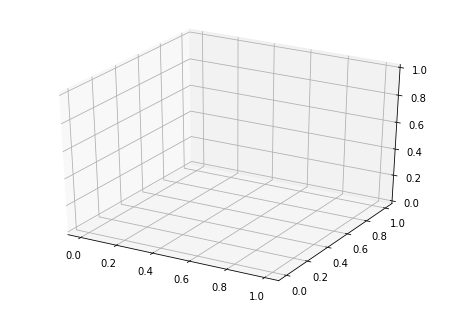

In [8]:
# setup a figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1], projection='3d')
# setup dummy lines and points to be filled after
lines = ax.plot([], [], color='r')[0]
pts = ax.plot([], [], color='r')[0]

plt.plot(x,y,z)
min(y)

In [12]:
def animate(i):
    
    x,y,z,vx,vy,vz = u_num[:i].T
    lines.set_data(x,y)
    lines.set_3d_properties(z)
        
    pts.set_data(x[-1:], y[-1:])
    pts.set_3d_properties(z[-1:])
        
    fig.canvas.draw()
    return [lines, pts]

anim = animation.FuncAnimation(fig, animate, 
                              frames=50, interval=30, blit=True)

In [13]:
plt.show()

In [16]:
x,y,z,vx,vy,vz = u_num.T
ax.plot(x,y,z, lw=2)


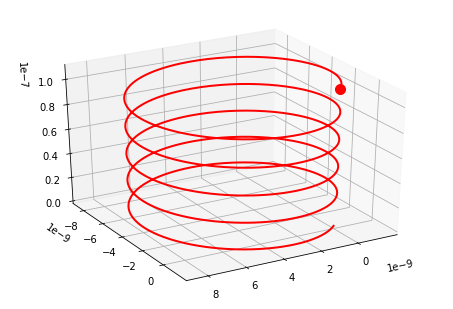

In [17]:
fig=plt.figure()
axe=fig.add_axes([0,0,1,1], projection='3d')
axe.plot(x, y, z, color='r', lw=2)
axe.plot(x[-2:-1], y[-2:-1], z[-2:-1], marker='.', markersize=20, color='r') # particle point
axe.axis('on')
#axe.tick_params(axis='x', which='both',  labelbottom='off')
axe.view_init(30,60)

## Linear electric field

Let's assume a linearly polarizded electric field:
$$
\mathbf{E}(\mathbf{r},t)=E_0 \cos\left( \omega_{RF} t - k_\parallel z \right) \mathbf{\hat{x}}
$$

In [22]:
E0 = 1e6

def fun2(u, t, omega_rf=(2*pi)*50e6, k_parallel=0):
    """
    Computes the derivatives f(u,t).
    
    Inputs:
     - u: (x,y,z,xdot,ydot,zdot) (6x1 array)
   
    Returns:
     - f(u) (6x1 array)
    
    """
    x, y, z, xdot, ydot, zdot = u # unpacking
    
    f = [xdot, 
         ydot, 
         zdot, 
         B0*e/m_p*ydot + e/m_p*E0*np.cos(omega_rf*t - k_parallel*z),
         -B0*e/m_p*xdot,
         0]        
    
    return f 

In [23]:
omega_rf = 1*omega_c
k_parallel = 6
nb_periode = 10
# time array
t = np.linspace(0, nb_periode*2*pi/omega_c, 1e4)
u_num2 = odeint(fun2, u0, t, args=(omega_rf, k_parallel))
x,y,z,vx,vy,vz = u_num2.T

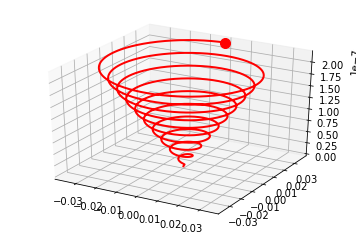

In [28]:
fig=plt.figure()
axe=fig.add_subplot(111, projection='3d')
axe.plot(x, y, z, color='r', lw=2)
axe.plot(x[-2:-1], y[-2:-1], z[-2:-1], marker='.', markersize=20, color='r') # particle point

In [ ]:
axe1=plt.subplots(231)
axe1.plot(x,y)
axe1.set_xticks(rotation='vertical')

axe2=plt.subplot(132, sharex=axe1)
axe2.plot(x,z)
axe2.set_xticks(rotation='vertical')

axe3=plt.subplot(133, sharex=axe1, sharey=axe2)
axe3.plot(y,z)
axe3.set_xticks(rotation='vertical')

AttributeError: 'tuple' object has no attribute 'plot'

## Circular polarization

The velocity of the particle in the complex plane $u(x,y)=v_x(x,y) + i v_y(x,y)$ is defined by the differential equation
$$
\frac{du}{dt} + i \omega_c u(t) = E_+ e^{i \omega t - i k_\parallel z}
$$

In order to use the odeint module, we first need to rewrite the differential equation under the appropriate form, that is :
$$
\frac{d u}{d t} = f(u, t)
$$

In [ ]:
B0 = 3
omega_c = 1
omega = omega_c
k_parallel = 0
E0 = 1

def fun(u, t):
    f = -1j*omega_c*u + 1/B0*np.exp(-1j*omega*t)
    return f
def fun_re(u,t):
    return np.real(fun(u,t))
def fun_im(u,t):
    return np.imag(fun(u,t))

In [ ]:
u0 = 3 + 1j*2
t = np.linspace(0, 150, 1001)

u_re = odeint(fun_re, real(u0), t)
u_im = odeint(fun_im, imag(u0), t)

In [ ]:
plot(u_re, u_im)
axis('equal')
grid(True)

In [ ]:
from ipywidgets import *

In [ ]:
@interact
def pltfun(idx_t=(t[0], t[-1], t[1]-t[0])):
    plot(u_re[:idx_t+1], u_im[:idx_t+1])
    plot(u_re[idx_t], u_im[idx_t], '.', ms=10)

With
$$
\mathbf{u}=
\left( 
\begin{array}{c}
    x \\
    y \\
    v_x \\
    v_y
\end{array}
\right)
$$

We solve for:
$$
\mathbf{f}=
\frac{d}{dt} 
\left( 
\begin{array}{c}
    x \\
    y \\
    v_x \\
    v_y 
\end{array}
\right)=
\left( 
\begin{array}{c}
    v_x \\
    v_y \\
    \omega_c v_y + \frac{e}{m} E_x \\
    - \omega_c v_x + \frac{e}{m} E_y
\end{array}
\right)
$$

In [ ]:
e/m_p / 1e6

In [ ]:
omega_c = 1
E0 = 1

def fun_x(v,t):
    x, y, vx, vy = v
    f = (vx,
         vy,
         omega_c * vy + E0*np.cos(omega*t),
         omega_c * (-vx) + E0*np.sin(omega*t))
    
    return f


In [ ]:
x0, y0 = 0, 0
vx0, vy0 = 1,1

t = np.linspace(0, 100, 1001)

u = odeint(fun_x, (x0, y0, vx0, vy0), t)
x,y,vx,vy = u.T

In [ ]:
plot(x, y)
axis('equal')

In [ ]:
@interact
def plot_xy(indx=(t[0], t[-1], t[1]-t[0])):
    plot(u[:indx+1,0], u[:indx+1,1], lw=2)
    plot(u[indx,0], u[indx,1], '.', ms=20)